In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

matplotlib.rcParams['figure.dpi'] = 100

In [6]:
samplerate, wav2 = wavfile.read('chicks/short.wav')
wav = wav2[:, 0]
wav.shape

(53843,)

In [10]:
samplerate

48000

In [11]:
wav.shape[0] / samplerate


1.1217291666666667

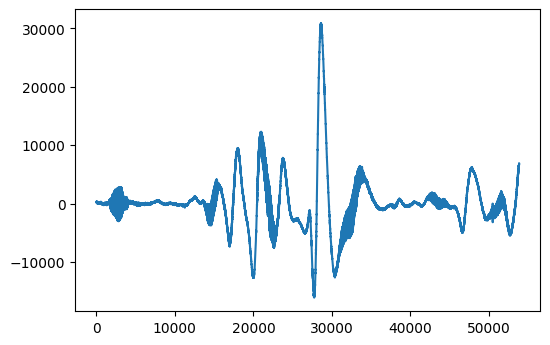

In [7]:
plt.plot(wav)

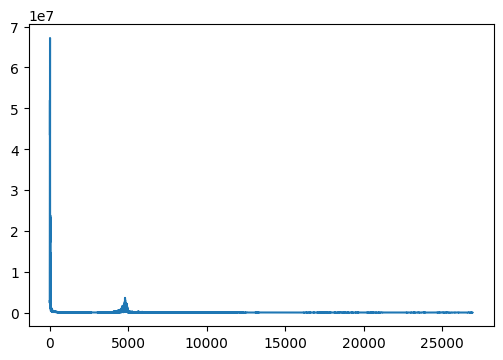

In [8]:
# This is the core of fft code; it doesn't have proper scale along x and/or y axis.
fft = np.fft.fft(wav)
fft = np.abs(fft)
plt.plot(fft[1: len(fft)//2])

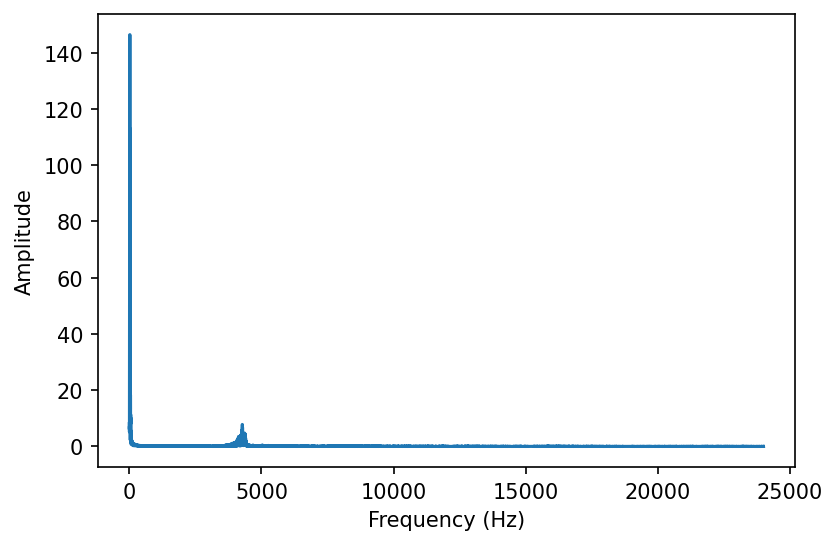

In [7]:
# Full FFT code which gives meaning to X and Y axis
N = len(wav)  # Total number of samples
T = 1/samplerate  # Time between samples
freqs = np.fft.fftfreq(N, d=T)  # Array of frequencies
freqs = freqs[:N//2]  # Keep only positive frequencies
fft = np.fft.fft(wav) / N  # Compute the FFT and normalize the result
fft = abs(fft[:N//2])  # Keep only the positive frequencies
plt.plot(freqs, fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# Spectrogram

# load the long audio file

#samplerate, wav2 = wavfile.read('chicks/audio/0.wav')
#wav = wav2[:,0]
#wav.shape
#wav = wav[:1000000]

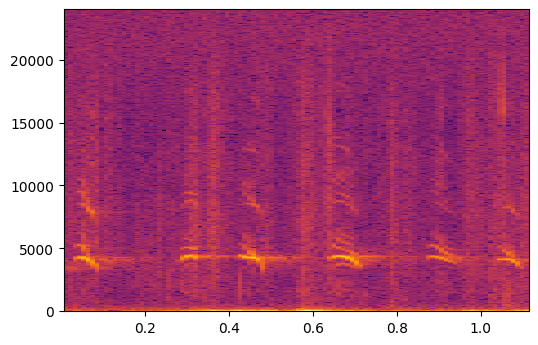

In [12]:
# Google Spectrogram

fs = samplerate  # Sample rate
nperseg = 1024  # Number of samples per segment
noverlap = nperseg // 2  # Overlap between segments
nfft = 4096  # Number of points in FFT
# Calculate the spectrogram
f, t, Sxx = signal.spectrogram(wav, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, nfft=nfft)
# Plot the spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='inferno')

In [14]:
Sxx.shape

(2049, 104)

In [15]:
f.shape, t.shape

((2049,), (104,))

(104,)


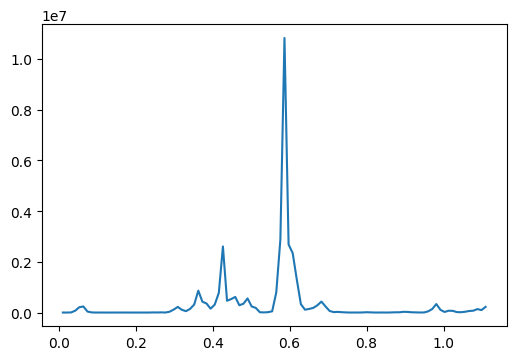

In [17]:
total = np.sum(Sxx, axis=0)
print(total.shape)
plt.plot(t, total)

In [19]:
total = np.sum(Sxx, axis=0)  # 0 - 1.0 x10^7

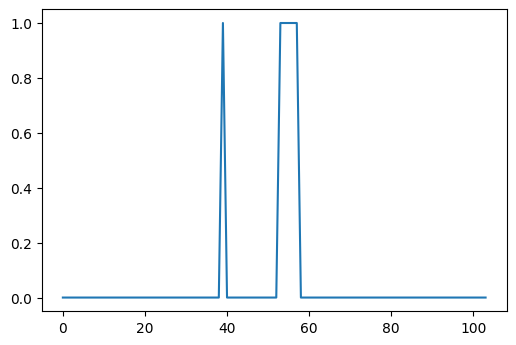

In [29]:
th = (total > 0.1 * 1e7).astype(np.float32)
plt.plot(th)

In [28]:
th.dtype   # bool [false/0, true/1]

dtype('bool')

In [30]:
switches = np.concatenate(([0], np.where(np.diff(th) != 0)[0]+1, [len(th)]))

# create a list of ranges for each segment of continuous 1s
ranges = [(switches[i], switches[i+1]-1) for i in range(len(switches)-1) if th[switches[i]] == 1]

In [31]:
ranges

[(39, 39), (53, 57)]

In [41]:
# t: time offset
i = 0
for (begin, end) in ranges:
    print(begin,end)
    seg = th[begin:(end+1)]
    begin_time = t[begin]
    end_time = t[end+1]
    print(begin_time, end_time)
    
    off_begin = round(begin_time * samplerate)
    off_end = round(end_time * samplerate)
    print(off_begin, off_end)
    
    audio_segment = wav[off_begin:off_end]
    wavfile.write("audio_seg%d.wav" % i, samplerate, seg)
    i = i + 1

39 39
0.4266666666666667 0.43733333333333335
20480 20992
53 57
0.576 0.6293333333333333
27648 30208
